Dataset shape: (144, 1)
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Missing values per column:
 Passengers    0
dtype: int64


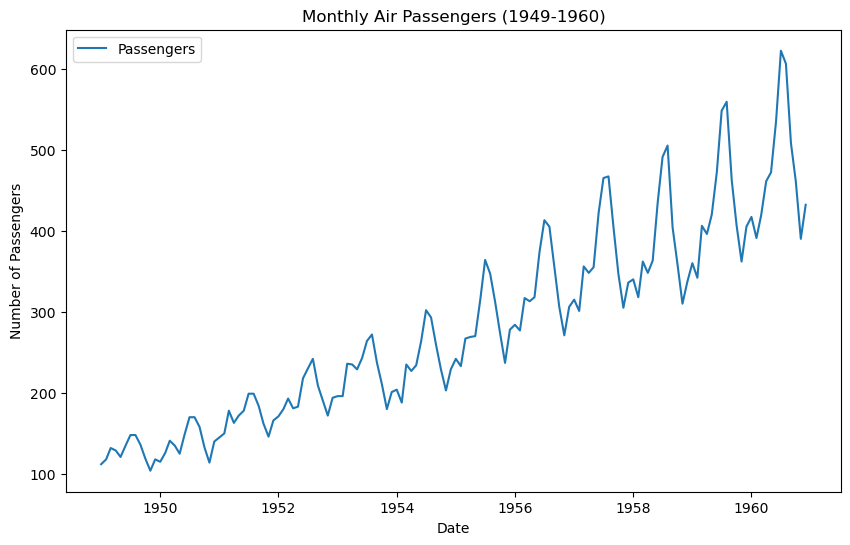

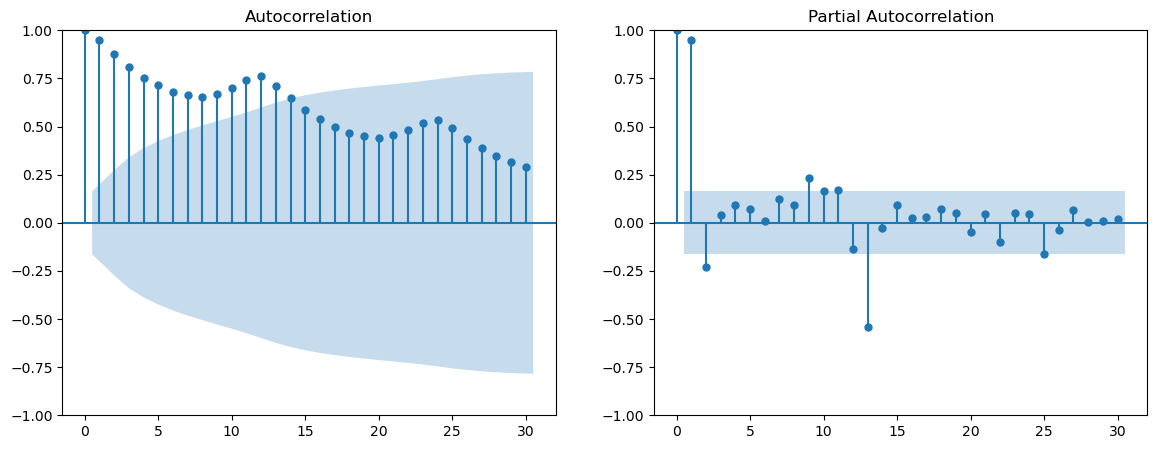

d:\apps\anaconda3\envs\data_science\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\apps\anaconda3\envs\data_science\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\apps\anaconda3\envs\data_science\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Wed, 24 Sep 2025   AIC                           1057.516
Time:                        18:17:33   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

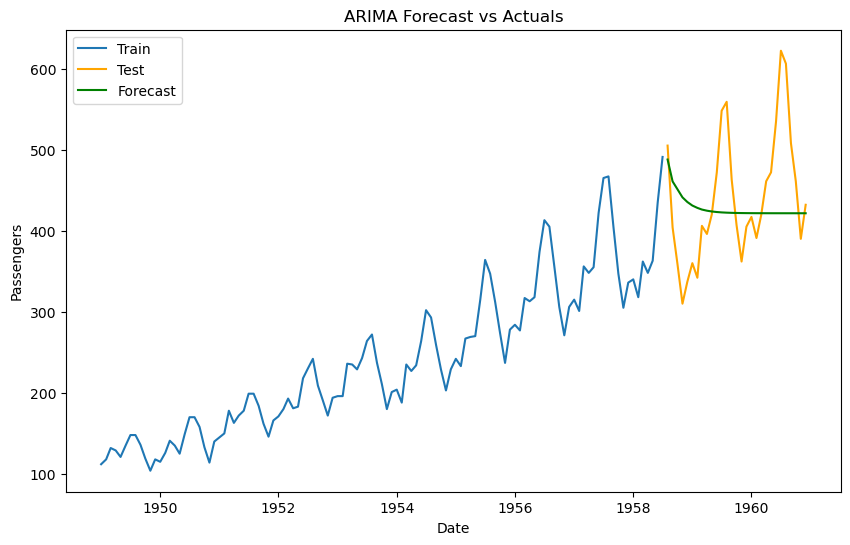

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=["Month"], index_col="Month")
print("Dataset shape:", df.shape)
print(df.head())
print("\nMissing values per column:\n", df.isnull().sum())
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Passengers"], label="Passengers")
plt.title("Monthly Air Passengers (1949-1960)")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df["Passengers"], ax=axes[0], lags=30)
plot_pacf(df["Passengers"], ax=axes[1], lags=30)
plt.show()
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
model = ARIMA(train["Passengers"], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)
mae = mean_absolute_error(test["Passengers"], forecast)
rmse = np.sqrt(mean_squared_error(test["Passengers"], forecast))
mape = np.mean(np.abs((test["Passengers"] - forecast) / test["Passengers"])) * 100
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")
plt.figure(figsize=(10, 6))
plt.plot(train.index, train["Passengers"], label="Train")
plt.plot(test.index, test["Passengers"], label="Test", color="orange")
plt.plot(forecast.index, forecast, label="Forecast", color="green")
plt.title("ARIMA Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()


Dataset shape: (144, 1)
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Missing values per column:
 Passengers    0
dtype: int64
ADF Statistic: 0.8153688792060619
p-value: 0.9918802434376413
Selected d: 1


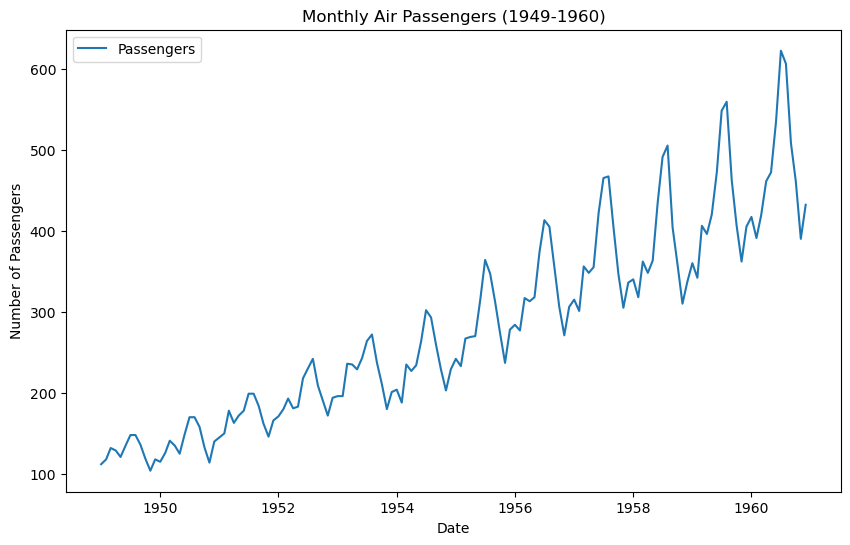

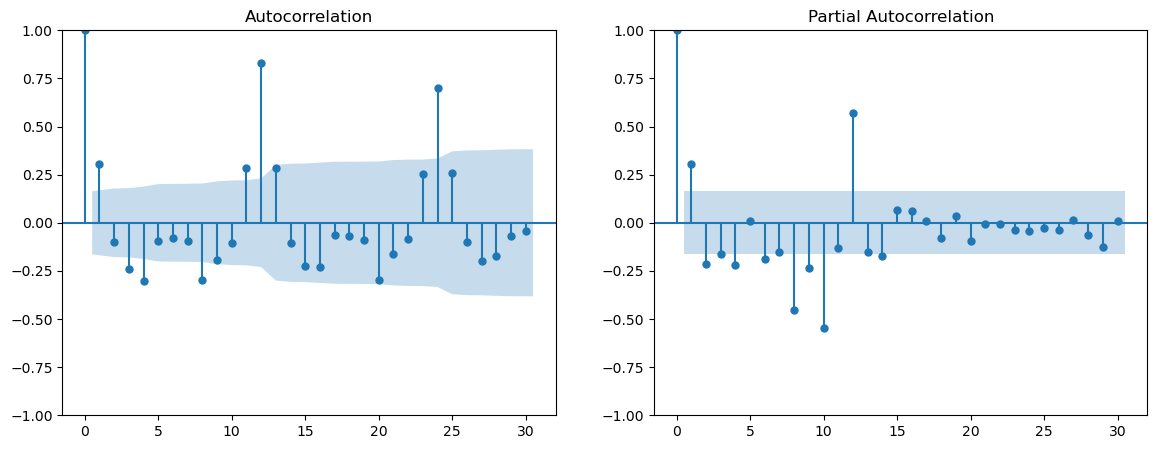

d:\apps\anaconda3\envs\data_science\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\apps\anaconda3\envs\data_science\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\apps\anaconda3\envs\data_science\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Sat, 15 Nov 2025   AIC                           1057.516
Time:                        11:03:56   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

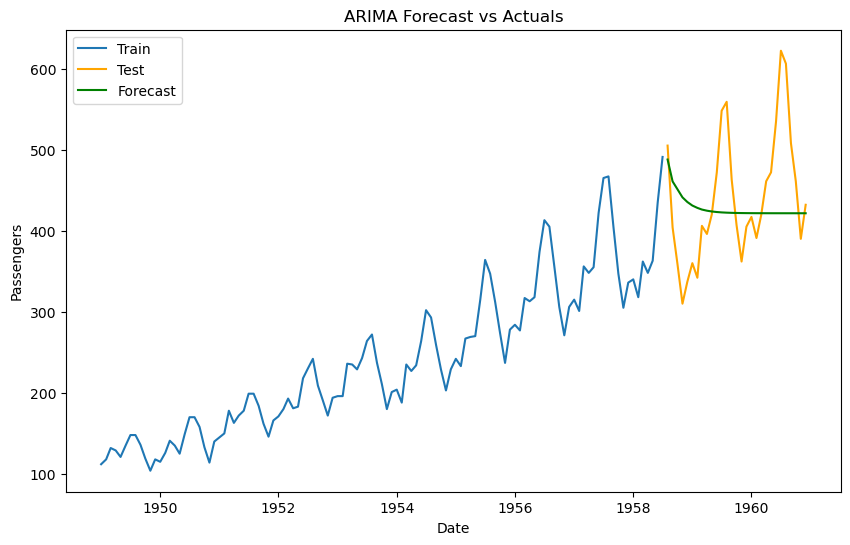

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=["Month"], index_col="Month")
print("Dataset shape:", df.shape)
print(df.head())
print("\nMissing values per column:\n", df.isnull().sum())
result=adfuller(df["Passengers"])
print("ADF Statistic:",result[0])
print("p-value:",result[1])
d=0
if result[1]>0.05:
    d=1
print("Selected d:",d)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Passengers"], label="Passengers")
plt.title("Monthly Air Passengers (1949-1960)")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df["Passengers"].diff().dropna() if d==1 else df["Passengers"], ax=axes[0], lags=30)
plot_pacf(df["Passengers"].diff().dropna() if d==1 else df["Passengers"], ax=axes[1], lags=30)
plt.show()
p=2
q=2
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
model = ARIMA(train["Passengers"], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)
mae = mean_absolute_error(test["Passengers"], forecast)
rmse = np.sqrt(mean_squared_error(test["Passengers"], forecast))
mape = np.mean(np.abs((test["Passengers"] - forecast) / test["Passengers"])) * 100
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")
plt.figure(figsize=(10, 6))
plt.plot(train.index, train["Passengers"], label="Train")
plt.plot(test.index, test["Passengers"], label="Test", color="orange")
plt.plot(forecast.index, forecast, label="Forecast", color="green")
plt.title("ARIMA Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()


Dataset shape: (144, 1)
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Missing values per column:
 Passengers    0
dtype: int64
ADF Statistic: 0.8153688792060619
p-value: 0.9918802434376413
Selected d: 1


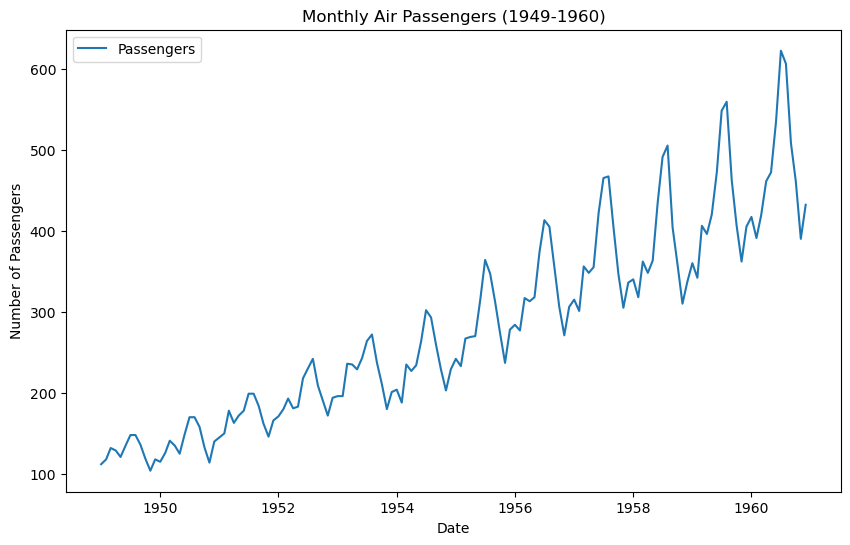

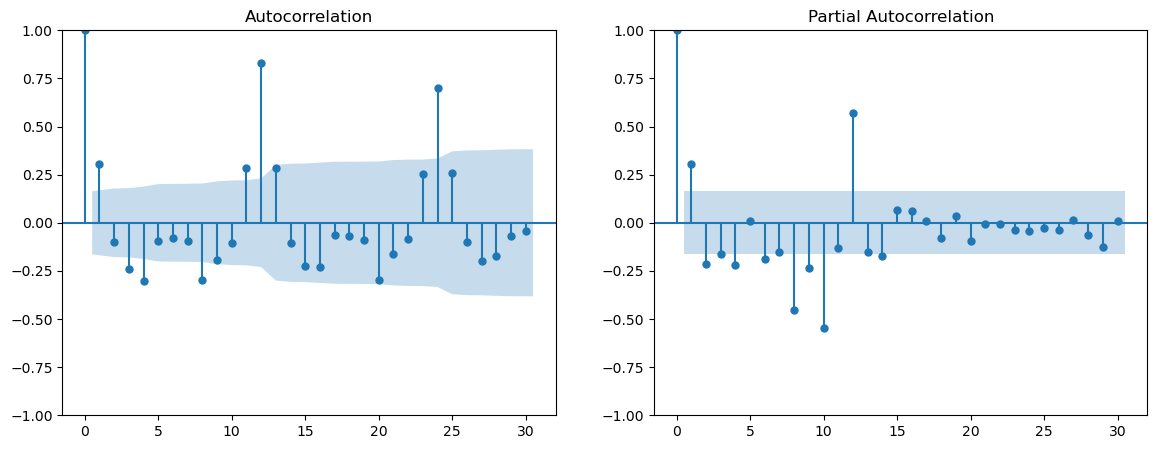

d:\apps\anaconda3\envs\data_science\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\apps\anaconda3\envs\data_science\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  115
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -371.857
Date:                              Sat, 15 Nov 2025   AIC                            757.714
Time:                                      11:07:30   BIC                            776.089
Sample:                                  01-01-1949   HQIC                           765.155
                                       - 07-01-1958                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1828      0.403      0.454      0.650      -0.607       0.972
ar.L2          0.57

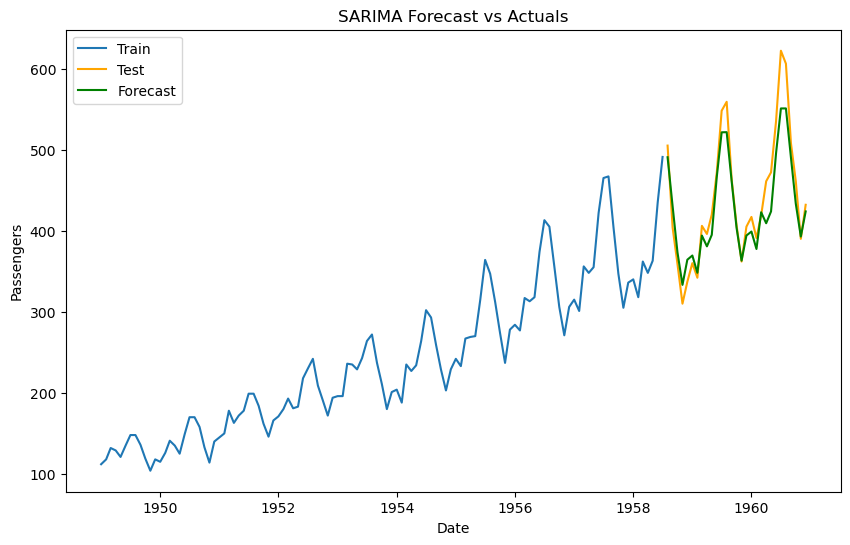

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=["Month"], index_col="Month")
print("Dataset shape:", df.shape)
print(df.head())
print("\nMissing values per column:\n", df.isnull().sum())
result=adfuller(df["Passengers"])
print("ADF Statistic:",result[0])
print("p-value:",result[1])
d=0
D=1
if result[1]>0.05:
    d=1
print("Selected d:",d)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Passengers"], label="Passengers")
plt.title("Monthly Air Passengers (1949-1960)")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df["Passengers"].diff().dropna(), ax=axes[0], lags=30)
plot_pacf(df["Passengers"].diff().dropna(), ax=axes[1], lags=30)
plt.show()
p=2
q=2
P=1
Q=1
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
model = SARIMAX(train["Passengers"], order=(p,d,q), seasonal_order=(P,D,Q,12))
model_fit = model.fit()
print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)
mae = mean_absolute_error(test["Passengers"], forecast)
rmse = np.sqrt(mean_squared_error(test["Passengers"], forecast))
mape = np.mean(np.abs((test["Passengers"] - forecast) / test["Passengers"])) * 100
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")
plt.figure(figsize=(10, 6))
plt.plot(train.index, train["Passengers"], label="Train")
plt.plot(test.index, test["Passengers"], label="Test", color="orange")
plt.plot(forecast.index, forecast, label="Forecast", color="green")
plt.title("SARIMA Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()


Dataset shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Missing values per column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


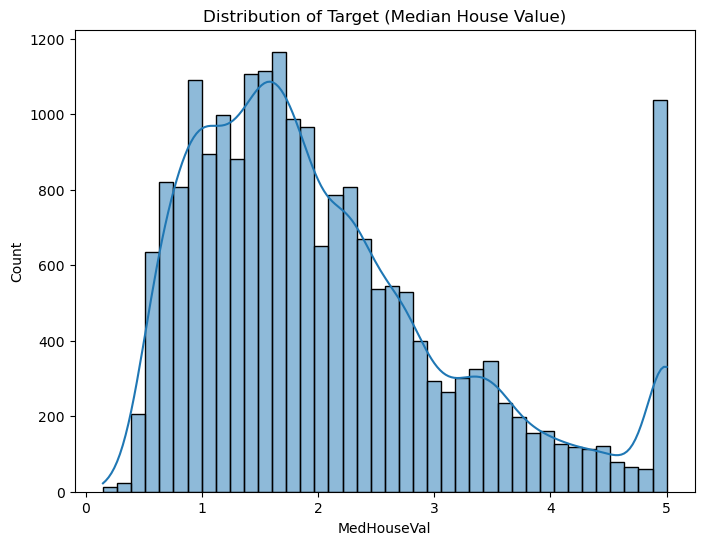

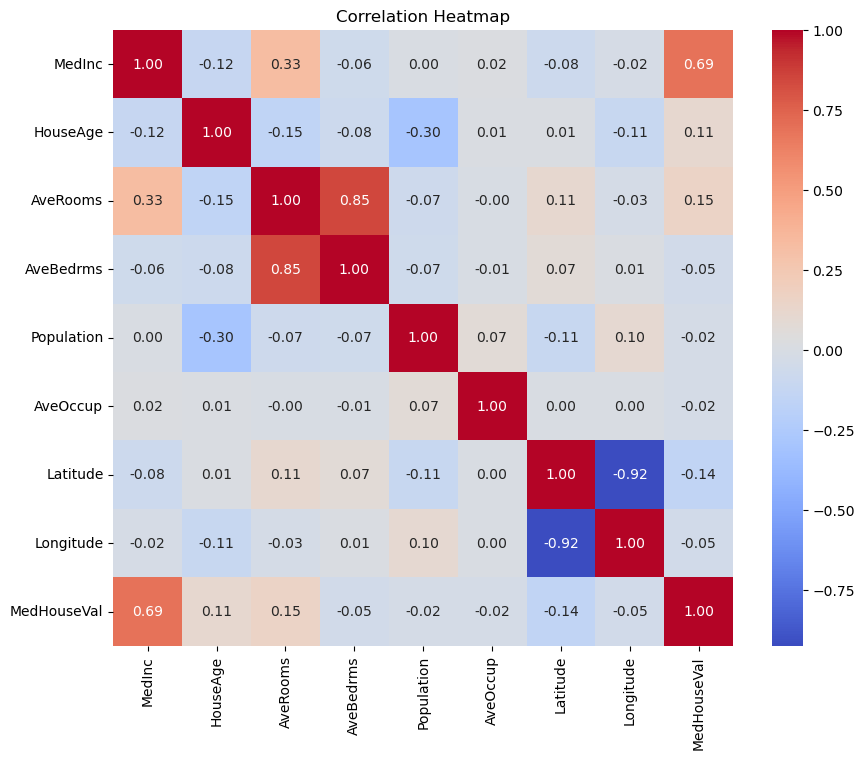

MAE:  0.328
RMSE: 0.505
MAPE: 18.92%
R²:   0.805


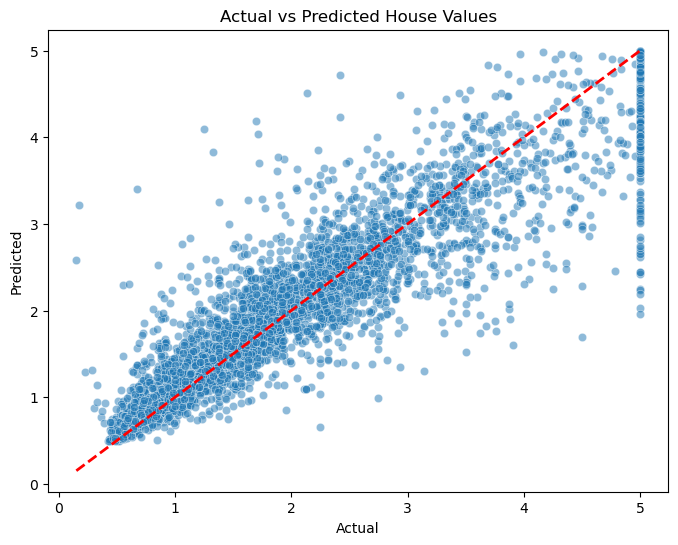

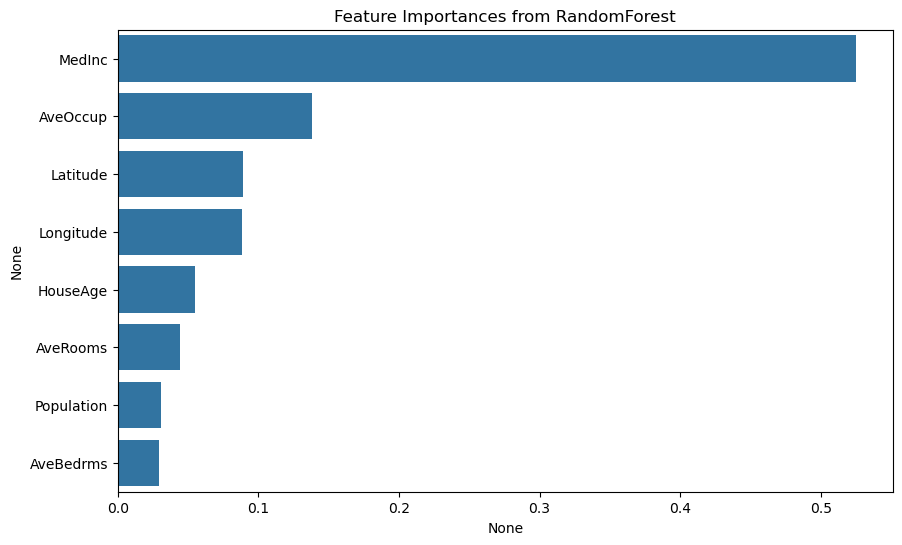

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data = fetch_california_housing(as_frame=True)
df = data.frame
print("Dataset shape:", df.shape)
print(df.head())
print("\nMissing values per column:\n", df.isnull().sum())
plt.figure(figsize=(8, 6))
sns.histplot(df['MedHouseVal'], bins=40, kde=True)
plt.title("Distribution of Target (Median House Value)")
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²:   {r2:.3f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2) 
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted House Values")
plt.show()
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importances from RandomForest")
plt.show()


Dataset shape: (569, 31)


C:\Users\DELL\AppData\Local\Temp\ipykernel_10420\634232946.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data.target, palette="Set2")


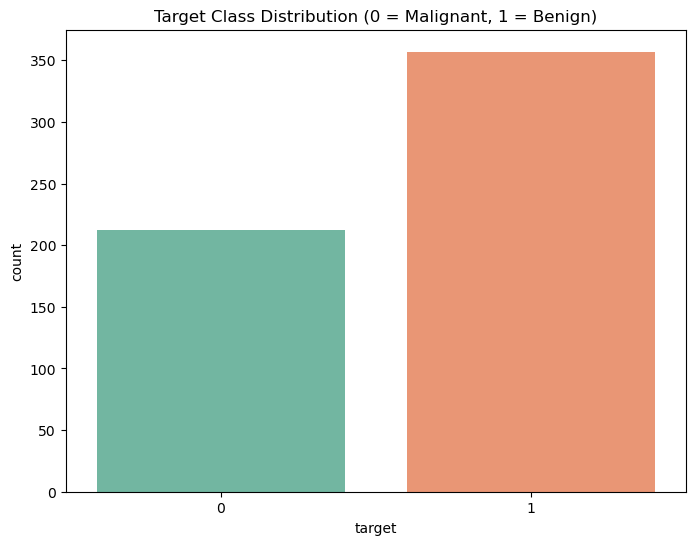

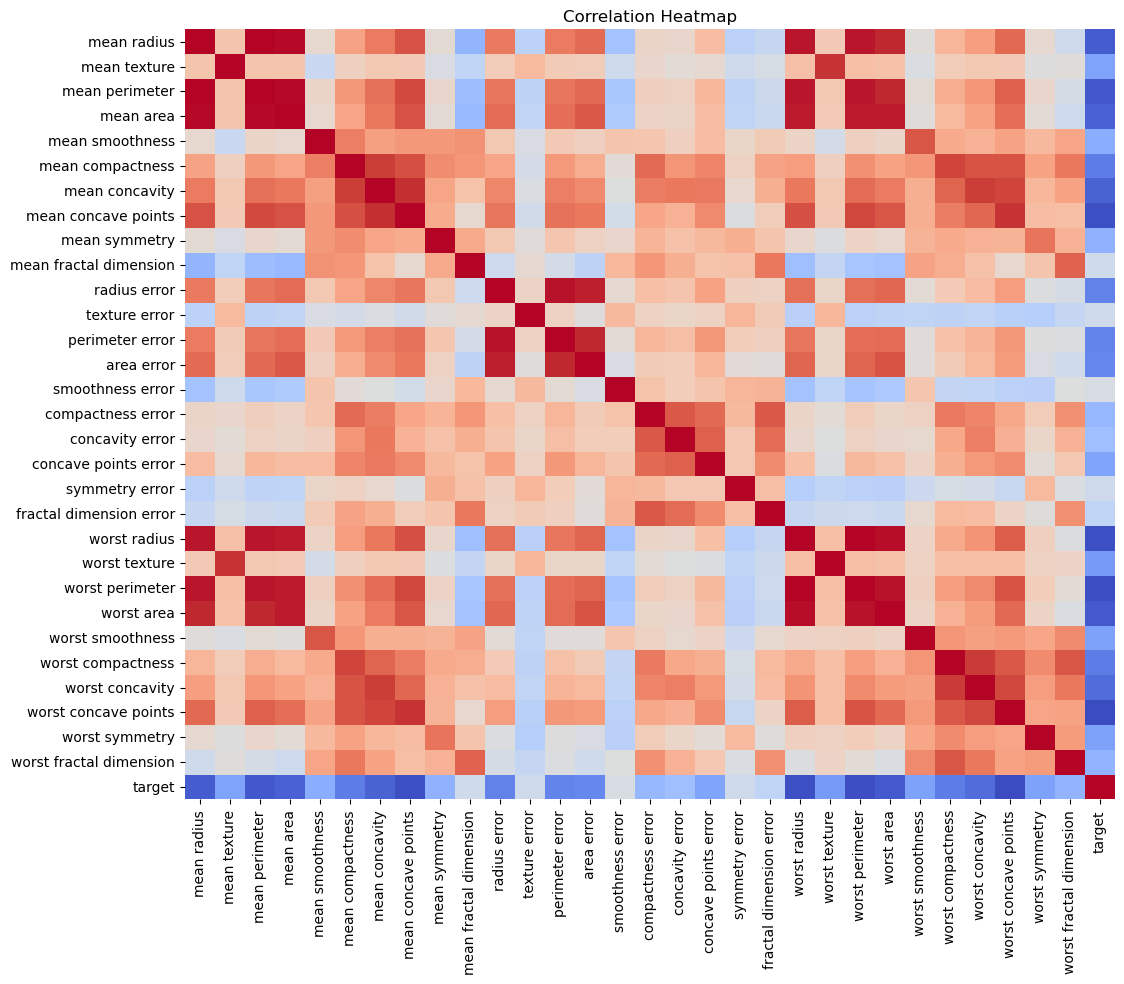

Accuracy:  0.956
Precision: 0.959
Recall:    0.972
F1 Score:  0.966
ROC-AUC:   0.994


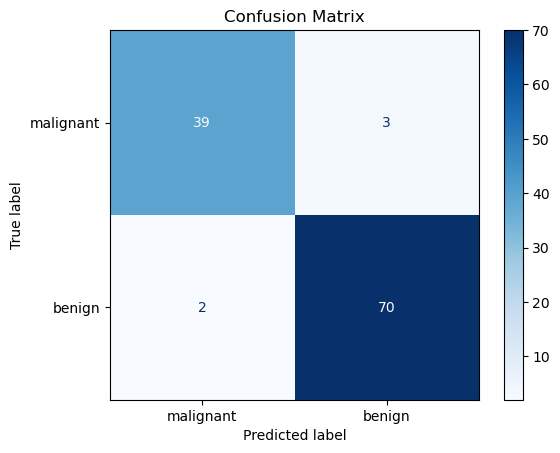

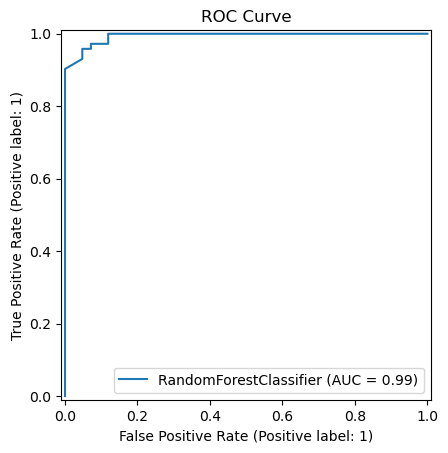

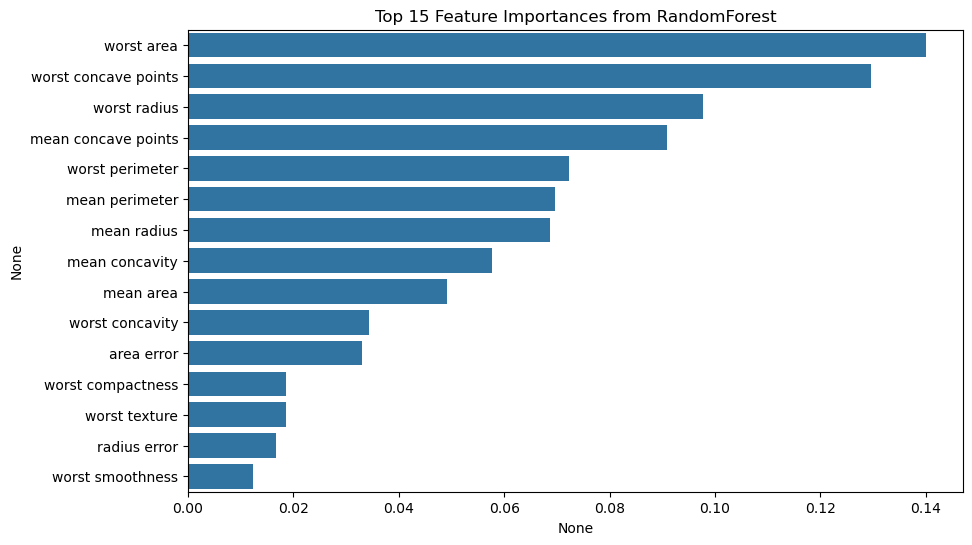

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
data = load_breast_cancer(as_frame=True)
df = data.frame
print("Dataset shape:", df.shape)
plt.figure(figsize=(8, 6))
sns.countplot(x=data.target, palette="Set2")
plt.title("Target Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", cbar=False)
plt.title("Correlation Heatmap")
plt.show()
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Top 15 Feature Importances from RandomForest")
plt.show()